# Introduction to python for climate science

**Content creator:** Ligin Joseph

#### In this session, we will use xarray to:
- Open a netcdf file
- Plot spatial maps
- Plot time series
- Compute moving averages
- Compute and plot trend line
- Detrend a data
- Plot the regression map between Indian Summer Monsoon Rainfall and ENSO

In [1]:
#Imports

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import cartopy.feature as cfeatures
from scipy import stats


### Open Netcdf file

In [4]:
#Open a netcdf file
ds_sst = xr.open_dataset('../Data/Observations/OISST/sst.oisst.mon.mean.1982.nc') 
ds_sst

<xarray.Dataset> Size: 129MB
Dimensions:  (lat: 180, lon: 360, time: 499)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2023-07-01
Data variables:
    sst      (time, lat, lon) float32 129MB ...
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...
    history:        Tue Aug  8 15:12:26 2023: ncks -d time,4, /scratch/csmith...
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

### Spatial plot

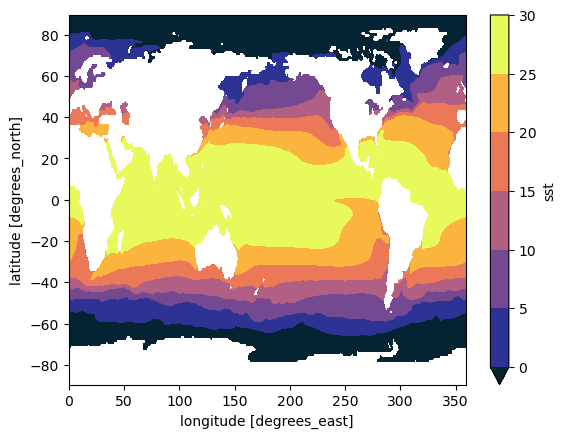

In [32]:
## Plot the mean SST
ds_sst.sst.mean('time').plot.contourf(cmap='cmo.thermal',vmax=30,vmin=0)

### Plotting time series

In [19]:
IO_eq = ds_sst.sst.sel(lon=slice(50,100),lat=slice(-5,5))  ##Selecting data from 50E to 100E and 5S to 5N
IO_eq

<xarray.DataArray 'sst' (time: 499, lat: 10, lon: 51)> Size: 1MB
array([[[27.510237, 27.493279, ..., 28.295002, 27.93391 ],
        [27.226149, 27.037344, ..., 28.322111, 28.067581],
        ...,
        [26.037697, 25.965054, ..., 28.542477, 29.054567],
        [25.950958, 25.96761 , ..., 28.730347, 29.60274 ]],

       [[27.477818, 27.979242, ..., 28.08347 , 28.030722],
        [27.396534, 27.53349 , ..., 28.160898, 28.203957],
        ...,
        [26.790798, 27.116789, ..., 28.595587, 28.751032],
        [26.689716, 26.942434, ..., 28.68823 , 29.131742]],

       ...,

       [[27.529558, 27.759695, ..., 29.655075, 29.668123],
        [27.48603 , 27.650763, ..., 29.869814, 29.83901 ],
        ...,
        [28.149185, 28.468088, ..., 30.312485, 30.241203],
        [27.924522, 28.290964, ..., 30.5936  , 30.648808]],

       [[26.441696, 26.427513, ..., 29.153269, 29.218794],
        [26.193476, 26.250422, ..., 29.44446 , 29.420336],
        ...,
        [26.752138, 26.65667 , ..., 30.254175, 30.158318],
        [26.77687 , 26.762316, ..., 30.509838, 30.487534]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 80B -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon      (lon) float64 408B 50.0 51.0 52.0 53.0 ... 97.0 98.0 99.0 100.0
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2023-07-01
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Monthly Mean of Sea Surface Temperature
    units:          degC
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Individual Observations
    actual_range:   [-1.8     36.02645]

In [20]:
IO_eq_sm = IO_eq.mean(['lat','lon'])  ##Spatial mean
IO_eq_sm

<xarray.DataArray 'sst' (time: 499)> Size: 2kB
array([28.027416, 28.5081  , 29.028254, 29.942062, 30.08101 , 29.242142,
       28.6732  , 28.458803, 28.331951, 28.602615, 28.708717, 28.517319,
       28.39244 , 28.777271, 29.260874, 29.831505, 29.62989 , 29.394667,
       29.063208, 28.657608, 28.607216, 28.470264, 28.163822, 28.13785 ,
       28.154943, 28.04467 , 28.650255, 29.231672, 28.895222, 28.537342,
       28.097698, 27.74679 , 27.745958, 27.802055, 28.1338  , 27.884216,
       28.114347, 28.098938, 28.761156, 29.208694, 28.85916 , 28.086008,
       28.107811, 27.792772, 27.923063, 27.744473, 27.843094, 27.851978,
       27.73372 , 28.485773, 28.638832, 29.178324, 29.015553, 28.661774,
       28.087833, 27.652966, 27.748981, 28.081293, 28.478474, 28.494307,
       28.213858, 28.599552, 29.192225, 29.6249  , 29.90971 , 29.175058,
       28.710577, 28.549767, 28.80241 , 28.58437 , 28.49132 , 28.492462,
       28.493711, 28.850937, 29.513588, 29.809612, 29.204613, 28.891668,
       28.519941, 28.456926, 28.481634, 28.534336, 28.31937 , 28.32877 ,
       27.983408, 28.21913 , 28.811527, 29.208637, 29.067844, 28.493273,
       28.048573, 27.838226, 28.145056, 28.114597, 28.18582 , 28.298378,
       28.259785, 28.668806, 29.32193 , 29.591213, 29.490812, 28.697525,
       28.43463 , 28.2023  , 28.383377, 28.325699, 28.442162, 28.56161 ,
       28.481432, 28.793999, 29.233906, 29.85844 , 29.835537, 28.636427,
       28.159096, 28.194868, 28.264027, 28.473347, 28.411608, 28.147207,
...
       28.461199, 28.73719 , 29.300264, 29.868238, 29.853115, 29.279987,
       28.590334, 28.530537, 28.673037, 28.993689, 28.973057, 28.638893,
       28.237904, 28.648607, 29.595594, 30.193073, 30.163033, 29.608868,
       29.225594, 29.162468, 29.282906, 29.521952, 29.316704, 29.364408,
       29.426104, 29.495386, 30.246788, 30.787117, 30.257166, 29.217028,
       28.613043, 28.624283, 28.416788, 28.717827, 28.679905, 28.600975,
       28.322948, 28.694275, 29.359522, 29.952038, 29.987421, 29.300718,
       28.98713 , 28.867754, 28.778812, 29.00699 , 28.946358, 28.505   ,
       28.307875, 28.897043, 29.53766 , 29.909727, 29.768343, 29.00912 ,
       28.502726, 28.425264, 28.837553, 28.817398, 28.930332, 28.870495,
       28.756731, 29.047482, 29.678236, 30.231897, 30.214218, 29.567556,
       28.988459, 28.82346 , 28.744476, 28.856419, 28.990067, 29.022572,
       29.271107, 29.328777, 29.947357, 30.400173, 30.128956, 29.64511 ,
       29.243305, 28.88964 , 28.960533, 29.06926 , 29.042507, 28.732481,
       28.343328, 28.8966  , 29.488167, 29.868057, 29.988018, 29.31405 ,
       28.853207, 28.549746, 28.816668, 28.929762, 28.718723, 28.73444 ,
       28.903404, 28.856808, 29.374517, 30.243792, 29.92261 , 29.333889,
       28.696026, 28.511103, 28.426878, 28.44888 , 28.484718, 28.376865,
       28.273705, 28.507853, 29.27118 , 30.310982, 29.92781 , 29.446192,
       29.029852], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2023-07-01

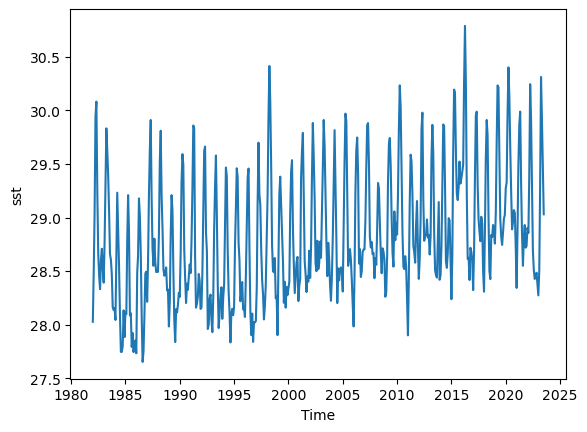

In [21]:
IO_eq_sm.plot()  ##Plotting the time series

### Compute moving average

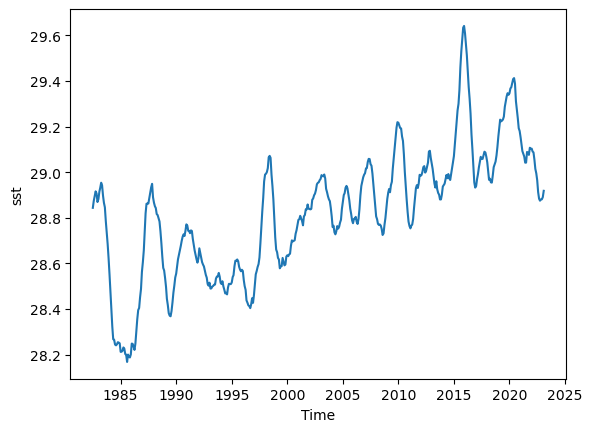

In [22]:
## Lets make this graph smooth by taking the moving average

IO_eq_sm_mov_avg = IO_eq_sm.rolling(time=12,center=True).mean()
IO_eq_sm_mov_avg.plot()

### Compute and plot trend

Lets compute and plot trend using [.polyfit()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.polyfit.html)

In [23]:
p = IO_eq_sm_mov_avg.polyfit(dim='time', deg=1)  # Degree 1 for linear fit
p

<xarray.Dataset> Size: 24B
Dimensions:               (degree: 2)
Coordinates:
  * degree                (degree) int32 8B 1 0
Data variables:
    polyfit_coefficients  (degree) float64 16B 5.787e-19 28.22

In [24]:
##create a linear fit line using y=slope*x+intercept
fit = xr.polyval(IO_eq_sm_mov_avg['time'], p.polyfit_coefficients)  

Text(0, 0.5, 'SST (deg C)')

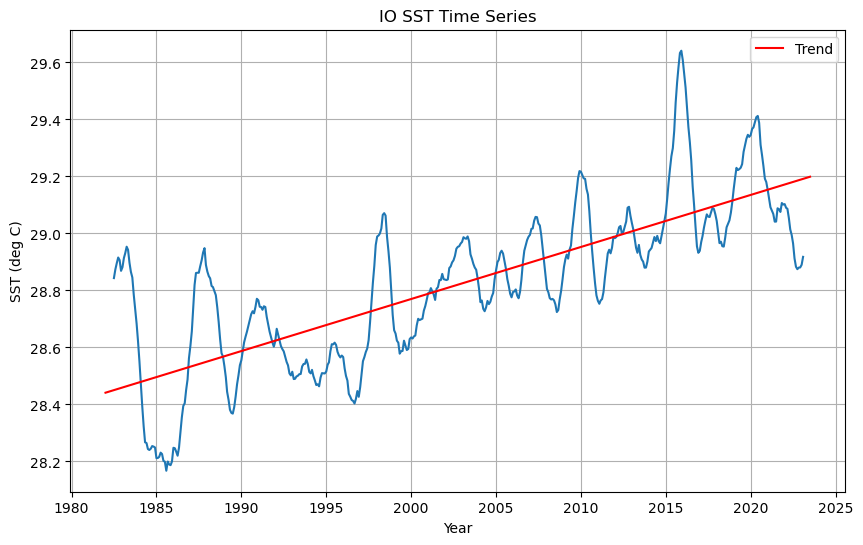

In [25]:
## Plot the trend line along with the time series
IO_eq_sm_mov_avg.plot(figsize=(10,6))
fit.plot(color='red',label='Trend')
plt.legend()
plt.grid()
plt.title('IO SST Time Series')
plt.xlabel('Year')
plt.ylabel('SST (deg C)')

### Detrending

In [26]:
detrend_sst = IO_eq_sm_mov_avg-fit  ## We can subtract the linear fit to detrend the data

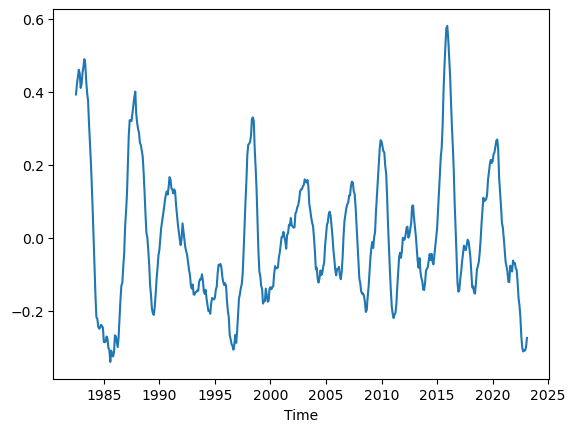

In [27]:
detrend_sst.plot()  ##Plot the detrended data

We can use this method to find the trend at each lat and lon

In [28]:
 # Degree 1 for linear fit, instead of proving the spatial mean data as input, we provide the whole SST dataset
p = ds_sst.sst.polyfit(dim='time', deg=1) 
p

<xarray.Dataset> Size: 1MB
Dimensions:               (lat: 180, lon: 360, degree: 2)
Coordinates:
  * lat                   (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 3kB 0.0 1.0 2.0 ... 357.0 358.0 359.0
  * degree                (degree) int32 8B 1 0
Data variables:
    polyfit_coefficients  (degree, lat, lon) float64 1MB nan nan ... -1.473

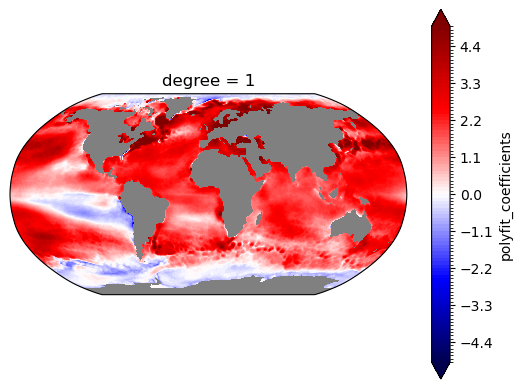

In [29]:
## We can plot the map of the slope, which is known as the trend. 
## Note: We need to convert the unit of trend from deg C/nano seconds to degc/decade or year as you wish
(p.polyfit_coefficients.isel(degree=0)*10e9*60*60*24*365*10).plot.contourf(levels=np.arange(-5,5.01,0.1),cmap='seismic',subplot_kws=dict(projection=ccrs.Robinson(), facecolor="gray"),
    transform=ccrs.PlateCarree()) 


### Linear regression

In [3]:
## Open precipitation dataset
ds_precip = xr.open_dataset('../PHD_materials/Data/Observations/IMD/IMD_1d_1951_2023.nc').sel(TIME=slice('1982','2023'))
ds_precip

<xarray.Dataset> Size: 2GB
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 15340)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 123kB 1982-01-01 1982-01-02 ... 2023-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 2GB ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

In [4]:
## Convert daily data to JJAS
precip_JJAS = ds_precip.RAINFALL.sel(TIME=ds_precip['TIME.month'].isin([6, 7, 8, 9]))
precip_JJAS

<xarray.DataArray 'RAINFALL' (TIME: 5124, LATITUDE: 129, LONGITUDE: 135)> Size: 714MB
[89234460 values with dtype=float64]
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 41kB 1982-06-01 1982-06-02 ... 2023-09-30
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1951_rfp25.grd

In [5]:
## Group by daily JJAS data to yearly JJAS mean 
precip_JJAS_mean = precip_JJAS.groupby('TIME.year').mean()
precip_JJAS_mean

<xarray.DataArray 'RAINFALL' (year: 42, LATITUDE: 129, LONGITUDE: 135)> Size: 6MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * year       (year) int64 336B 1982 1983 1984 1985 ... 2020 2021 2022 2023
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1951_rfp25.grd

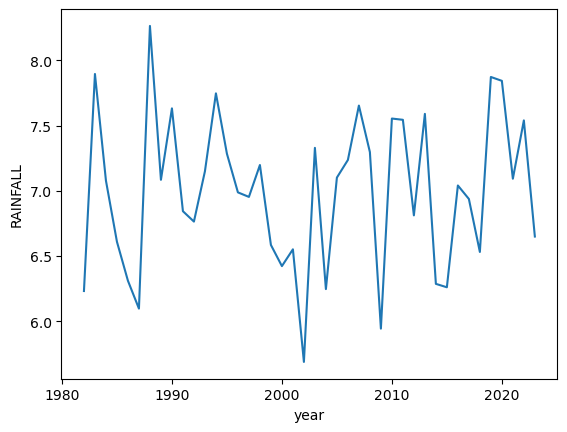

In [6]:
## Calculate the mean of JJAS rainfall over the Indian region
AISMR = precip_JJAS_mean.mean(['LATITUDE','LONGITUDE'])
AISMR.plot()

In [7]:
## Convert monthly SST data to JJAS mean 
sst_jjas = ds_sst.sst.sel(time=ds_sst['time.month'].isin([6, 7, 8, 9]))
sst_jjas_mean = sst_jjas.groupby('time.year').mean()

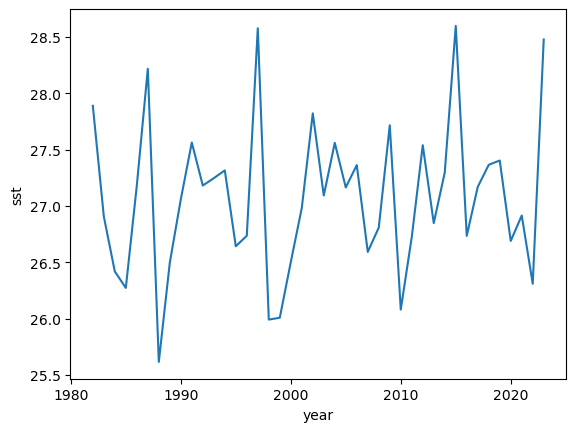

In [8]:
## Nino 3.4 is the SST averaged over 5S-5N, 120W-170W
nino_sst = sst_jjas_mean.sel(lat=slice(-5,5),lon=slice(190,240)).mean(['lat','lon'])
nino_sst.plot()

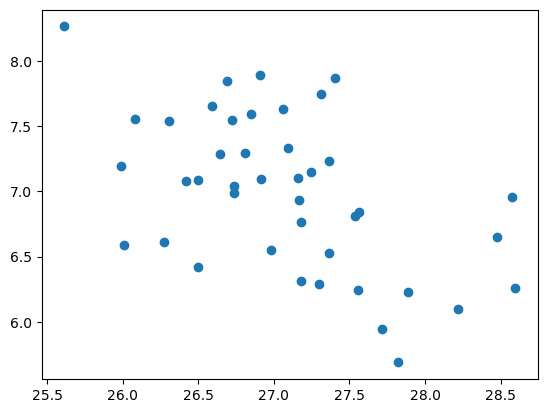

In [9]:
## Scatter plot
plt.scatter(nino_sst,AISMR)

We need to detrend the data before performing the regression analysis

In [10]:
AISMR_trend = AISMR.polyfit(dim='year', deg=1)  # Degree 1 for linear fit
nino_trend = nino_sst.polyfit(dim='year', deg=1)  # Degree 1 for linear fit

In [14]:
fit_aismr = xr.polyval(AISMR['year'], AISMR_trend.polyfit_coefficients)  
fit_nino = xr.polyval(nino_sst['year'], nino_trend.polyfit_coefficients)  

In [15]:
detrend_nino = nino_sst-fit_nino  ## We can subtract the linear fit to detrend the data
detrend_aismr = AISMR-fit_aismr 

Lets compute the fit line using [.linregress()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) from scipy.stats

In [16]:
## stats.linregress(x_values,y_values) will return slope, intersept, p_value etc
slope,intercept, r_value, p_value, std_err = stats.linregress(detrend_nino, detrend_aismr)

In [18]:
slope

-0.4624192048387494

In [19]:
## Define a function to perform linear regression

def linear_regression(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return slope,p_value

In [24]:
detrend_nino

<xarray.DataArray (year: 42)> Size: 336B
array([ 0.96725106, -0.02254271, -0.5179479 , -0.67114996,  0.2300017 ,
        1.25863864, -1.35023663, -0.47649357,  0.07804135,  0.57480649,
        0.18583516,  0.24352102,  0.30544691, -0.37546701, -0.28953523,
        1.54475814, -1.04820221, -1.03929489, -0.55314033, -0.07996528,
        0.75215943,  0.01604112,  0.47588571,  0.07246622,  0.26404032,
       -0.51431622, -0.3055283 ,  0.59451138, -1.04818309, -0.41237987,
        0.39605939, -0.30249178,  0.13892973,  1.43253172, -0.43777429,
       -0.01087533,  0.17786445,  0.2085556 , -0.51269302, -0.294458  ,
       -0.90769728,  1.25302736])
Coordinates:
  * year     (year) int64 336B 1982 1983 1984 1985 1986 ... 2020 2021 2022 2023

In [27]:
## Caluclate the slope of linear regression along each latitude and longitude

nino_ismr_slope, nino_ismr_p_value = xr.apply_ufunc(linear_regression, detrend_nino, precip_JJAS_mean,
                       input_core_dims=[['year'], ['year']],
                       vectorize=True, dask='allowed',output_core_dims=[[], []])

- input_core_dims: Specifies the dimensions along which the function should be applied (in this case, 'year' for both input arrays).
- vectorize=True: Indicates that the function should be applied element-wise.
- dask='allowed': Allows the use of Dask for parallel computation.
- output_core_dims: Specifies the dimensions of the output (empty lists [] for both slope and p-value).

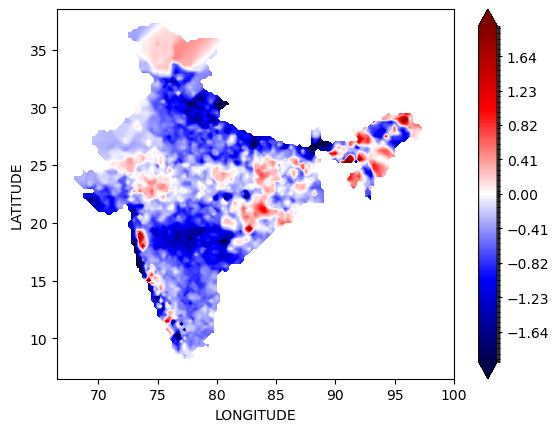

In [28]:
nino_ismr_slope.plot.contourf(levels=np.arange(-2,2.01,0.01),cmap='seismic')